# SI 671: Data Mining HW #3

Nov. 18, 2021

Cameron Milne

## Part 1: Exploratory Social Network Analysis

### Importing Data

In [1098]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [1099]:
amazon = pd.read_csv('amazonNetwork.csv')
amazon.head(2)

,FromNodeId,ToNodeId
0,1,2
1,1,4


In [1100]:
G = nx.from_pandas_edgelist(amazon, source='FromNodeId',target='ToNodeId', create_using=nx.DiGraph())
print(nx.is_directed(G)) # check, expect 'True'
print(nx.info(G))

True
Name: 
Type: DiGraph
Number of nodes: 2647
Number of edges: 10841
Average in degree:   4.0956
Average out degree:   4.0956


There are a total of 2647 nodes and 10841 edges. This means there are 2647 unique products in the dataset and 10841 relationships between those products.

### Feature Extraction and Exploration

The following code chunks cover various NetworkX properties of the graph generated above:

- Betweenness Centrality
- Closeness Centrality
- Degree Centrality
- Eigenvector Centrality
- Clustering Coefficient

Each of these features are used to create dictionaries with a value for every node's ID. These dictionaries will be used in part 2 for generating features. Each of code chunks also display a histogram with value counts to get a sense of the distribution

#### Betweeness Centrality

Betweenness centrality assigns a score based on the number of times a node lies on the shortest path between other nodes. It's the percentage of all the shortest paths between any nodes which it's passed through. Specifically for the Amazon co-purchases data, it's a measure of a product's influence on others. 

Below is a dictionary *betweenness_centrality* that stores the betweenness centrality for every node's ID. The top three nodes are listed. Node 18 has the highest value at approximately 0.147 which indicates it's one of the most popular products in the network. 

In [1101]:
betweenness_centrality = nx.centrality.betweenness_centrality(G) #saves results to a dictionary for feature extraction
print((sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:3])

[(18, 0.14755123846462548), (8, 0.14064924942426882), (97, 0.12884258103167212)]


The Betweenness Centrality Histogram displays the distribution of values in the dictionary. The output demonstrates this could be a useful feature for machine learning in the second part. 

(0.0, 0.01)

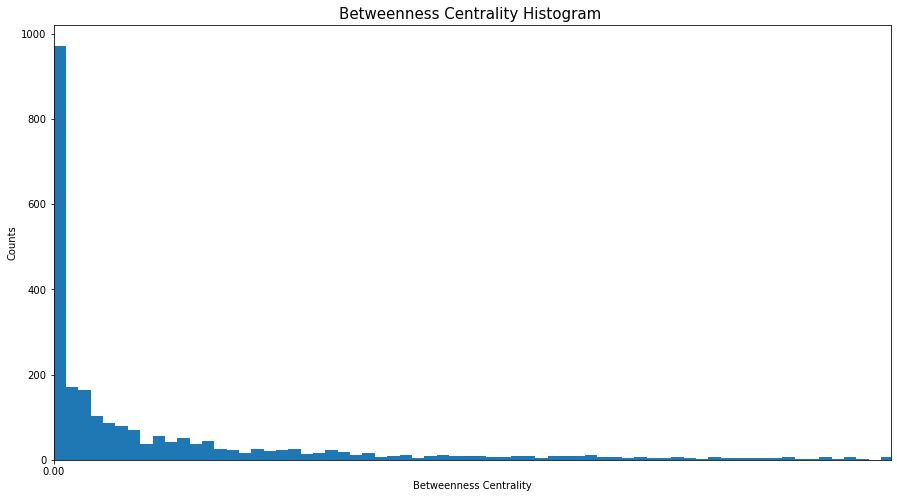

In [1102]:
plt.figure(figsize=(15,8))
plt.hist(betweenness_centrality.values(), bins=1000)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title('Betweenness Centrality Histogram ', fontdict ={'size': 15}, loc='center') 
plt.xlabel('Betweenness Centrality', fontdict ={'size': 10})
plt.ylabel('Counts',fontdict ={'size': 10})
plt.xlim([0, 0.01])

#### Closeness Centrality

Closeness centrality assigns a score based on a node's closeness to all other nodes in the network. It's another measure of product relevancy. The higher the measure, the closer a node is to the center of the network of products.

Below is a dictionary *closeness_centrality* that stores the betweenness centrality for every node's ID. The top three nodes are listed. Node 8 has the highest value at approximately 0.195 which indicates it's one of the most popular products in the network. 

[(8, 0.19516508604388655), (23, 0.16990260028693674), (21, 0.1695715352045382)]


Text(0, 0.5, 'Counts')

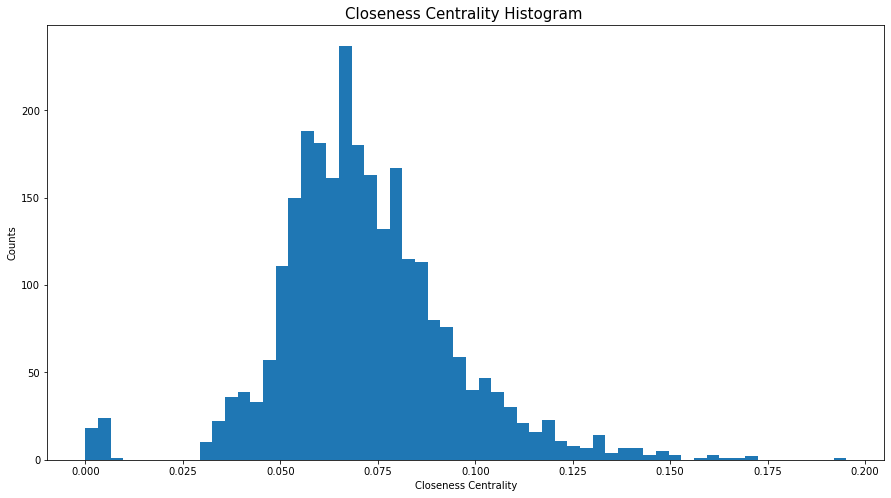

In [1103]:
closeness_centrality = nx.closeness_centrality(G)
print((sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:3])

plt.figure(figsize=(15,8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title('Closeness Centrality Histogram ', fontdict ={'size': 15}, loc='center') 
plt.xlabel('Closeness Centrality', fontdict ={'size': 10})
plt.ylabel('Counts',fontdict ={'size': 10})

#### Degree Centrality

Degree centrality assigns an importance score based simply on the number of links held by each node. The higher the degree centrality of a node, the more edges connecting that node and its neighbors. For our purposes, a higher degree centrality for a product means that it's related to more recommended products. 

Below is a dictionary *degree_centrality* that stores the degree centrality for every node's ID. The top three nodes are listed. Node 8 has the highest value at approximately 0.02 which means that it has a relationship with about 2% of the entire collection

A Degree Centrality Histogram displays the distribution of values underneath. The output demonstrates this could be a useful feature for machine learning in the second part. 

In [1104]:
degree_centrality = nx.degree_centrality(G)
print((sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:3])

[(8, 0.020408163265306124), (481, 0.01927437641723356), (18, 0.016250944822373395)]


(0.0, 0.025)

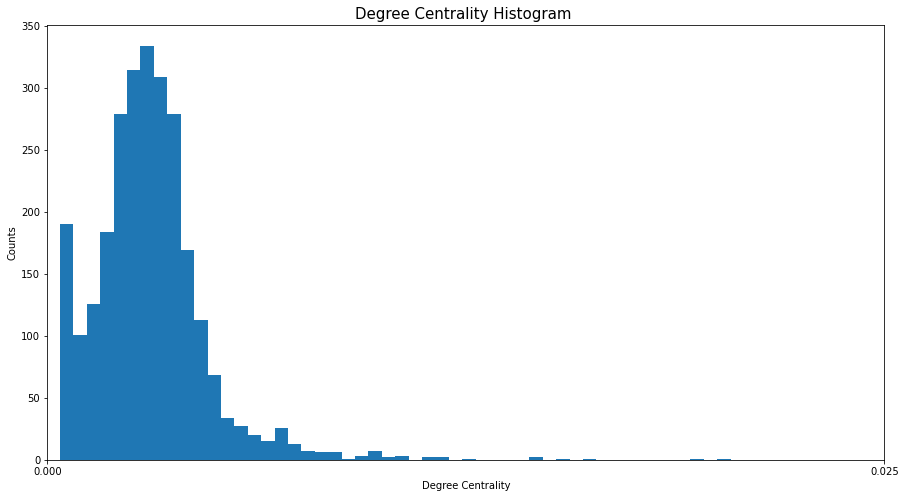

In [1105]:
plt.figure(figsize=(15,8))
plt.hist(degree_centrality.values(), bins=50)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title('Degree Centrality Histogram ', fontdict ={'size': 15}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 10})
plt.ylabel('Counts',fontdict ={'size': 10})
plt.xlim([0, 0.025])

#### Eigenvector Centrality

Eigenvector centrality assigns a score based on a node's connectivity with other important nodes. It measures a product's influence based on how well it is connected inside the network. A product with a high eigenvector centrality value meants it's connected with other products that have a high eigenvector values. 

Below is a dictionary *eigenvector_centrality* that stores the eigenvector centrality for every node's ID. The top three nodes are listed. Node 262 has the highest value at approximately 0.344 which indicates it's one of the most popular products on the basis of popular nodes.

In [1106]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)  # save results in a variable to use again 
print((sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:3])

[(1004, 0.35431961658299266), (1005, 0.3236302143756237), (747, 0.3056174246440942)]


(-0.5, 0.5)

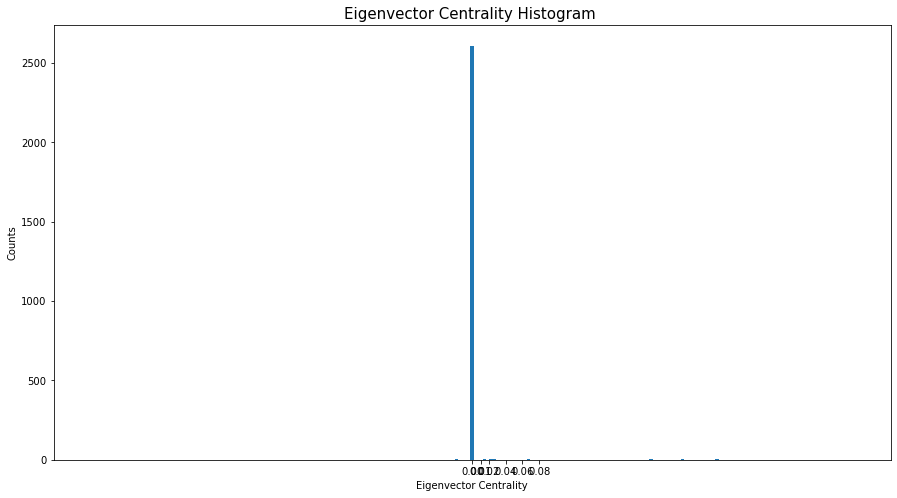

In [1107]:
plt.figure(figsize=(15,8))
plt.hist(eigenvector_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title('Eigenvector Centrality Histogram ', fontdict ={'size': 15}, loc='center') 
plt.xlabel('Eigenvector Centrality', fontdict ={'size': 10})
plt.ylabel('Counts',fontdict ={'size': 10})
plt.xlim([-0.5, 0.5])

#### Clustering Coefficients

Clustering coefficients assign a score based on the probability that two randomly selected friends of a node are connected to each other. The closer the the average clustering coefficient is to 1, the more clustered the graph is on general. 

Below is a dictionary *clustering_coefficients* that stores the clustering coefficients for every node's ID. The top three nodes are listed. These are nodes that found two connected nodes that are connected with each other. 

This might be one feature that doesn't help as much as others. "Random" pairings might hurt in a network where many products are related to many other products. 

In [1108]:
clustering_coefficients = nx.clustering(G)  # save results in a variable to use again 
print((sorted(clustering_coefficients.items(), key=lambda item: item[1], reverse=True))[:3])

[(44, 1.0), (351, 1.0), (1122, 1.0)]


Text(0, 0.5, 'Counts')

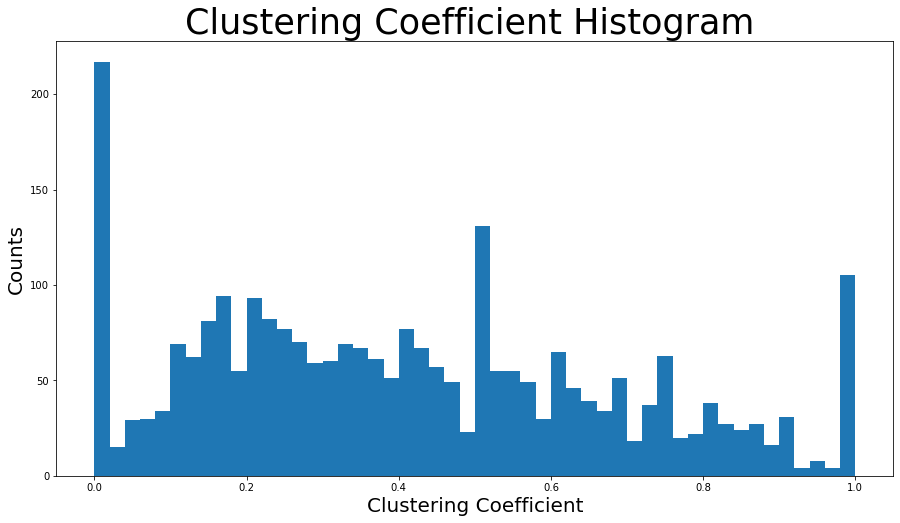

In [1109]:
plt.figure(figsize=(15,8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title('Clustering Coefficient Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Clustering Coefficient', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

### Other Relevant Information

In [1110]:
nx.average_shortest_path_length(G)

9.592795477759587

The average shortest distance for the Amazon co-purchases dataset is 9.59. This means that any two random items are likely to be 9.59 recommendations apart.

In [1111]:
print(nx.transitivity(G))
print(nx.average_clustering(G))

0.4339169154480595
0.4086089178720651


The fraction of all possible triangles in the DiGraph is 0.4339. Transitivity is an important metric because it demonstrates the likelihood of a product related to a product related to a product. In other words, what's the strength of the network's connectivity?

The clustering coefficient is 0.4086, an average clustering coefficient for each node. This is somewhat related to the transitivity and is the average of all clustering coefficients--the probability that two randomly selected friends of a node are connected to each other. 

In [1112]:
import operator

pageranks = nx.pagerank(G, alpha=0.5, weight='count')
pageranks = {k:v for k, v in sorted(pageranks.items(), key=lambda t: t[1], reverse=True)}
top10 = list(pageranks.keys())[0:10]
for i, airport in enumerate(top10):
    print("{}. Node...{}".format(i, airport))


0. Node...8
1. Node...481
2. Node...33
3. Node...18
4. Node...23
5. Node...30
6. Node...346
7. Node...99
8. Node...93
9. Node...21


The top 10 node IDs are listed above according to the pagerank algorithm. The algorithm is a way of measuring the importance of a node by analyzing the quantity and quality of nodes that relate to it.

The nodes above are consistent with findings from other functions. For example, nodes 8 and 481 (the top 2 in the pageranks dictionary) also have the top 2 highest degree centralities. Additionally, node 8 is within the top three betweenness centralities and closeness centralities, supporting the strength of that node's influence. 

## Part 2: Predicting Review-Rating using Features derived from network properties

The following sections (1) read in the training data, (2) explore relevant columns, (3) generate features for training, (4) implement models, and (5) evaluate the models for best performance

The prediction is treated as a regressor problem. The following models are explored:
- SVR
- SVC (linear)
- Linear Regression
- Multi-layer Perceptron
- KNN
- Logistic Regression
- Ridge
- Lasso

These models will be evaluated through mean absolute error and the model with the lowest value will be chosen for the test data submission

### Data Exploration

In [1113]:
train = pd.read_csv('reviewTrain.csv')
test = pd.read_csv('reviewTest.csv')

In [1114]:
train.head(5)

,id,title,group,review
0,3,World War II Allied Fighter Planes Trading Cards,Book,5.0
1,5,Prayers That Avail Much for Business: Executive,Book,0.0
2,7,Batik,Music,4.5
3,10,The Edward Said Reader,Book,4.0
4,11,Resetting the Clock : Five Anti-Aging Hormone...,Book,5.0


In [1115]:
test.head(5)

,id,title,group,review
0,90,The Eagle Has Landed,Book,NaN
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,NaN
2,1382,The Darwin Awards II : Unnatural Selection,Book,NaN
3,253,Celtic Glory,Music,NaN
4,671,Sublte Aromatherapy,Book,NaN


In [1116]:
train.group.value_counts()

 Book     1213
 Music     318
 Video      80
 DVD        62
 Toy         1
Name: group, dtype: int64

In [1117]:
test.group.value_counts()

 Book     726
 Music    197
 DVD       39
 Video     38
Name: group, dtype: int64

Because toys are not seen in the test file, we should drop the one row from the training data. 

In [1118]:
train = train[train['group'].str.contains("Toy") == False]

In [1119]:
train.group.value_counts() #confirming "Toy" was dropped

 Book     1213
 Music     318
 Video      80
 DVD        62
Name: group, dtype: int64

This histogram lays out the distribution of reviews for each product which will be the labels in every model

Text(0, 0.5, 'Count')

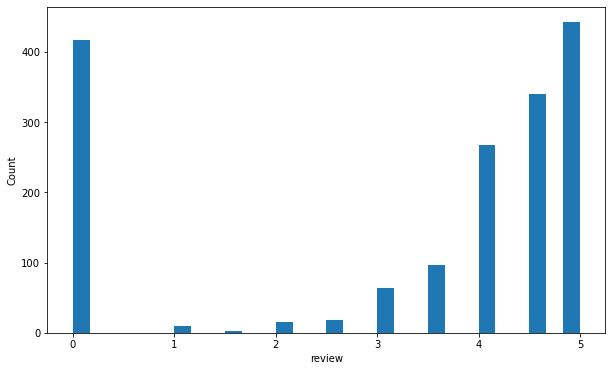

In [1120]:
plt.figure(figsize=(10,6))
plt.hist(train['review'], bins=30)
plt.xlabel('review'); plt.ylabel('Count')

The features added to the *train* dataframe pull from the NetworkX functions above. The following features used:

- Eigenvector Centrality
- Betweenness Centrality
- Closeness Centrality
- Degree Centrality
- Pageranks

Additionally, dummy variables were created for each category within "Group" (Book, DVD, Music, Toy, Video).

In [1121]:
def generate_features(df):
    
    #New features
    df['eigenvector_centrality'] = df['id'].apply(lambda x: eigenvector_centrality.get(x)) 
    df['betweenness_centrality'] = df['id'].apply(lambda x: betweenness_centrality.get(x))
    df['closeness_centrality'] = df['id'].apply(lambda x: closeness_centrality.get(x))
    df['degree_centrality'] = df['id'].apply(lambda x: degree_centrality.get(x))
    df['pageranks'] = df['id'].apply(lambda x: pageranks.get(x)) 
    
    #convert labels to numeric
    df['review'] = df['review'].astype("string")
    df['review'] = pd.to_numeric(df['review'])*2
    
    #generate dummies for group column
    new = pd.get_dummies(df, columns = ['group'])

    %time
    return new

train_features = generate_features(train)

Wall time: 0 ns


In [1122]:
train_features.columns #Confirming new features

Index(['id', 'title', 'review', 'eigenvector_centrality',
       'betweenness_centrality', 'closeness_centrality', 'degree_centrality',
       'pageranks', 'group_ Book', 'group_ DVD', 'group_ Music',
       'group_ Video'],
      dtype='object')

This table displays the percentage of missing values for every column. It will give a sense of what is worth dropping or imputing if necessary

In [1123]:
#https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [1124]:
missing_values_table(train_features)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
eigenvector_centrality,21,1.3
betweenness_centrality,21,1.3
closeness_centrality,21,1.3
degree_centrality,21,1.3
pageranks,21,1.3


1.3% of the data across all categories is extremely small, so we can safely drop those rows before modelling

In [1125]:
train_features.dropna(inplace=True)

### Models

Splitting the data via a function will make for easier replication across models

In [1126]:
def split_data():
    '''
    Splits data in order to be used for
    ML methods later
    '''
    from sklearn.model_selection import train_test_split
    X = train_features.drop(columns=["id", "review", "title",])
    y = train_features["review"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data()

In [1127]:
X_train.columns #Confirmation of training features

Index(['eigenvector_centrality', 'betweenness_centrality',
       'closeness_centrality', 'degree_centrality', 'pageranks', 'group_ Book',
       'group_ DVD', 'group_ Music', 'group_ Video'],
      dtype='object')

StandardScaler was chosen over MinMax to normalize features. Because features vary on magnitudes of about 5, StandardScaler can convert all of the values within a feature to a scale that looks like a standard normally distributed range (with a mean of zero and unit variance). MinMax would have take the lowest and highest value, failing to adjust for the differences across features. 

In [1128]:
def scale_data(X_train, y_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, y_test)

The models are implemented below through functions. Where available, the feature importance is also listed. However, because the "coef_" applies only to linear kernels, it's not available for functions such as KNN and MLP

In [1129]:
def SVR():
    '''
    Fits a SVR model to the training data after using 
    MinMaxScaler on the features. It returns a tuple 
    with the model and the mean absolute error
    '''
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)

    svr = SVR(kernel='linear')
    svr.fit(X_train_scaled, y_train)

    y_pred = svr.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
    
    feature_importance = pd.DataFrame({
        'feature': list(X_train.columns),
        'feature_importance': [abs(i) for i in svr.coef_[0]]
    })
    feature_importance.sort_values('feature_importance', ascending=False)
    print(feature_importance)
    
    return (round(mae, 4), svr)

SVR_results = SVR()
SVR_results

                  feature  feature_importance
0  eigenvector_centrality            0.006152
1  betweenness_centrality            0.009732
2    closeness_centrality            0.004114
3       degree_centrality            0.059598
4               pageranks            0.012972
5             group_ Book            0.153297
6              group_ DVD            0.083881
7            group_ Music            0.229807
8            group_ Video            0.032886


(1.4754, SVR(kernel='linear'))

In [1130]:
def SVC():
    '''
    Fits a SVC model to the training data after using 
    MinMaxScaler on the features. It returns a tuple with 
    the model and the mean absolute error.
    '''
    from sklearn.svm import SVC
    from sklearn.metrics import mean_squared_error
    
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)

    #SVC
    svc = SVC(kernel='linear', C=0.1, gamma=1)
    svc.fit(X_train_scaled, y_train)

    accuracy = svc.score(X_test_scaled, y_test)
    y_pred = svc.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2

    feature_importance = pd.DataFrame({
        'feature': list(X_train.columns),
        'feature_importance': [abs(i) for i in svc.coef_[0]]
    })
    feature_importance.sort_values('feature_importance', ascending=False)
    print(feature_importance)
    
    return (round(mae, 4), svc)

SVC_results = SVC()
SVC_results

                  feature  feature_importance
0  eigenvector_centrality        2.206568e-15
1  betweenness_centrality        1.252033e-04
2    closeness_centrality        4.194574e-05
3       degree_centrality        3.934632e-04
4               pageranks        5.020121e-04
5             group_ Book        3.693729e-05
6              group_ DVD        0.000000e+00
7            group_ Music        2.081668e-17
8            group_ Video        8.038446e-05


(2.6227, SVC(C=0.1, gamma=1, kernel='linear'))

In [1131]:
def LinearRegression():
    '''
    Fits a Linear Regression model to the training 
    data after using MinMaxScaler on the features. 
    It returns a tuple with the model and the mean 
    absolute error.
    '''
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import mean_squared_error
    
    #Split and Scale
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)
    
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}    
    lr = LinearRegression()
    grid = GridSearchCV(lr, parameters, scoring='neg_mean_absolute_error')
    grid.fit(X_train_scaled, y_train)

    new = LinearRegression(fit_intercept=grid.best_params_['fit_intercept'], normalize=grid.best_params_['normalize'], copy_X=grid.best_params_['copy_X'],)
    new.fit(X_train_scaled, y_train)
    y_pred = new.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
    return (round(mae, 4), new)
    
LinearRegression_results = LinearRegression()
LinearRegression_results

(1.708, LinearRegression(normalize=True))

In [1132]:
def MLP():
    '''
    Fits a multi-layer perceptron model to the training 
    data after using MinMaxScaler on the features. 
    It returns a tuple with the model and the mean 
    '''
    from sklearn.neural_network import MLPRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import mean_squared_error
    
    #Split and Scale
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)
    
    param_list = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
    mlp = MLPRegressor()
    grid = GridSearchCV(mlp, param_list, scoring='neg_mean_absolute_error')
    grid.fit(X_train_scaled, y_train)

    #Fit New Model
    new = MLPRegressor(   
         activation=grid.best_params_['activation'],
         alpha=grid.best_params_['alpha'],
         hidden_layer_sizes=grid.best_params_['hidden_layer_sizes'],
         solver=grid.best_params_['solver'],
    )
    new.fit(X_train_scaled, y_train)
    y_pred = new.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
    return (round(mae, 4), new)
    
MLP_results = MLP()
MLP_results

(1.7331, MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1,), solver='lbfgs'))

In [1133]:
def KNN():
    '''
    Fits a KNN regressor model to the training 
    data after using MinMaxScaler on the features. 
    It returns a tuple with the model and the mean 
    '''
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    #Split and Scale
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)
    
    knn = KNeighborsRegressor(n_neighbors=10)
    knn = knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
    return (round(mae, 4), knn)
    
KNN_results = KNN()
KNN_results

(1.6984, KNeighborsRegressor(n_neighbors=10))

In [1134]:
def LogisticRegression():
    '''
    Fits a Logistic Regression model to the training 
    data after using MinMaxScaler on the features. 
    It returns a tuple with the model and the mean 
    '''
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_squared_error
    
    #Split and Scale
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)
    
    #Instantiate Model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_scaled, y_train)
    
    #Evaluate
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
    
    feature_importance = pd.DataFrame({
        'feature': list(X_train.columns),
        'feature_importance': [abs(i) for i in model.coef_[0]]
    })
    feature_importance.sort_values('feature_importance', ascending=False)
    print(feature_importance)
    
    return (round(mae, 4), model)
    
LogisticRegression_results = LogisticRegression()
LogisticRegression_results

                  feature  feature_importance
0  eigenvector_centrality            0.100218
1  betweenness_centrality            0.025080
2    closeness_centrality            0.058712
3       degree_centrality            0.062852
4               pageranks            0.048801
5             group_ Book            0.288417
6              group_ DVD            0.264842
7            group_ Music            0.169937
8            group_ Video            0.056523


(2.598, LogisticRegression(solver='liblinear'))

In [1135]:
def Ridge():
    '''
    Fits a Ridge model to the training 
    data after using MinMaxScaler on the features. 
    It returns a tuple with the model and the mean 
    '''
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error

    #Split and Scale
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)
    
    #Instantiate Model
    model = linear_model.Ridge(alpha=1000)
    model.fit(X_train_scaled, y_train)
    
    #Evaluate
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
       
    return (round(mae, 4), model)

Ridge_results = Ridge()
Ridge_results

(1.714, Ridge(alpha=1000))

In [1136]:
def Lasso():
    '''
    Fits a Lasso model to the training 
    data after using MinMaxScaler on the features. 
    It returns a tuple with the model and the mean 
    '''
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error

    #Split and Scale
    X_train, X_test, y_train, y_test = split_data()
    X_train_scaled, X_test_scaled = scale_data(X_train, y_test)
    
    #Instantiate Model
    model = linear_model.Lasso()
    model.fit(X_train_scaled, y_train)
    
    #Evaluate
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_pred, y_test) / 2
    return (round(mae, 4), model)

Lasso_results = Lasso()
Lasso_results

(1.7333, Lasso())

Each of the model results are listed below for ease of viewing with the mean absolute error followed by the model and its parameters. The SVR model is the best performing at a mean absolute error of 1.475 and will be used for the test data

In [1137]:
model_results = [
    SVR_results, 
    SVC_results, 
    LinearRegression_results, 
    MLP_results, 
    KNN_results, 
    LogisticRegression_results, 
    Ridge_results, 
    Lasso_results
]

for model in model_results:
    print(model)

(1.4754, SVR(kernel='linear'))
(2.6227, SVC(C=0.1, gamma=1, kernel='linear'))
(1.708, LinearRegression(normalize=True))
(1.7331, MLPRegressor(alpha=0.0005, hidden_layer_sizes=(1,), solver='lbfgs'))
(1.6984, KNeighborsRegressor(n_neighbors=10))
(2.598, LogisticRegression(solver='liblinear'))
(1.714, Ridge(alpha=1000))
(1.7333, Lasso())


## Test Data & Submission Materials

Now that SVR has been revealed as the most effective model on the training data, we can implement the model on the testing data. Below, the *reviewTest.csv* file is uploaded again. Then, I generate the same features, fill the null values with the median of those columns (because the submission file needs to be complete), and then refit the SVR model.   

In [1138]:
test = pd.read_csv('reviewTest.csv')
test.head(3)

,id,title,group,review
0,90,The Eagle Has Landed,Book,NaN
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,NaN
2,1382,The Darwin Awards II : Unnatural Selection,Book,NaN


In [1139]:
test_features = generate_features(test)

Wall time: 0 ns


In [1140]:
missing_values_table(test_features)

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
review,1000,100.0
eigenvector_centrality,6,0.6
betweenness_centrality,6,0.6
closeness_centrality,6,0.6
degree_centrality,6,0.6
pageranks,6,0.6


In [1141]:
test_features['eigenvector_centrality'].fillna(test_features['eigenvector_centrality'].median(), inplace=True)
test_features['betweenness_centrality'].fillna(test_features['betweenness_centrality'].median(), inplace=True)
test_features['closeness_centrality'].fillna(test_features['closeness_centrality'].median(), inplace=True)
test_features['degree_centrality'].fillna(test_features['degree_centrality'].median(), inplace=True)
test_features['pageranks'].fillna(test_features['pageranks'].median(), inplace=True)

In [1142]:
missing_values_table(test_features)

Your selected dataframe has 12 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
review,1000,100.0


In [1143]:
test_features.columns

Index(['id', 'title', 'review', 'eigenvector_centrality',
       'betweenness_centrality', 'closeness_centrality', 'degree_centrality',
       'pageranks', 'group_ Book', 'group_ DVD', 'group_ Music',
       'group_ Video'],
      dtype='object')

In [1144]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Splitting
X_train, X_test, y_train, y_test = split_data()

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Working Model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

#submission data
test_data = test_features.drop(columns=["id", "review", "title"])

# scaler = MinMaxScaler()
test_data_scaled = scaler.transform(test_data)

y_pred = svr.predict(test_data_scaled)
y_pred[:10] #sample 10 values.

array([8.00781633, 8.01707942, 7.99975732, 8.95482703, 7.99635382,
       7.97754404, 8.95135284, 8.01316198, 8.03676193, 8.98178726])

In [1146]:
type(y_pred)

numpy.ndarray

In [1147]:
converted = y_pred.round(0) / 2 #Round predictions to whole number and divide by two

In [1148]:
test['review'] = converted.tolist() #replace NAN values in "Review" column

In [1149]:
submission_data = test[['id', 'title', 'group', 'review']]

In [1150]:
submission_data.review.value_counts()

4.0    803
4.5    197
Name: review, dtype: int64

In [1151]:
submission_data.head(3)

,id,title,group,review
0,90,The Eagle Has Landed,Book,4.0
1,1372,Che in Africa: Che Guevara's Congo Diary,Book,4.0
2,1382,The Darwin Awards II : Unnatural Selection,Book,4.0


In [1152]:
import csv

with open('reviewTest_submission.csv', 'w', newline='', encoding='utf-8') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerow(submission_data.columns)
    csvwriter.writerows(submission_data.values)